<a href="https://colab.research.google.com/github/VivekanandaMudelli/hand_drawn_sketch_recognition/blob/main/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
import cv2
import numpy as np
from skimage import io, color
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm  # shows progress bar
import matplotlib.pyplot as plt

In [9]:
folder_path = '/content/drive/MyDrive/prml/png'

hog_features = []
labels = []
hog_images = []

for label_folder in tqdm(os.listdir(folder_path)):
    label_folder_path = os.path.join(folder_path, label_folder)

    if os.path.isdir(label_folder_path):
        for image_file in os.listdir(label_folder_path):
            image_path = os.path.join(label_folder_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128,128))
            features,hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
            hog_features.append(features)
            hog_images.append(hog_image)
            labels.append(label_folder)

100%|██████████| 251/251 [2:36:02<00:00, 37.30s/it]


In [10]:
Labels = LabelEncoder().fit_transform(labels)

In [11]:
HOG_feature = np.array(hog_features)

In [12]:
print(HOG_feature.shape)
print(Labels.shape)

(20180, 8100)
(20180,)


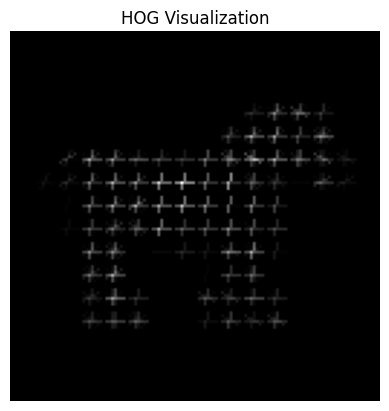

In [13]:
plt.imshow(hog_images[55], cmap='gray') # Changed hog_features[0] to hog_images[0]
plt.title('HOG Visualization')
plt.axis('off')
plt.show()

In [14]:
# Assuming you have your HOG features in 'HOG_feature' and labels in 'labels'

# 1. Create the new folder if it doesn't exist
new_folder_path = 'Hog_features_and_labels'  # Choose your desired folder name
os.makedirs(new_folder_path, exist_ok=True)

# 2. Save the HOG features
np.save(os.path.join(new_folder_path, 'hog_features.npy'), HOG_feature)

# 3. Save the labels
np.save(os.path.join(new_folder_path, 'labels.npy'), Labels)

print(f"HOG features and labels saved to '{new_folder_path}' folder.")

HOG features and labels saved to 'Hog_features_and_labels' folder.


In [16]:
import pandas as pd
from google.colab import files
# ... (Your existing code for feature extraction and saving to NumPy files)

# Load HOG features and labels
HOG_feature = np.load(os.path.join(new_folder_path, 'hog_features.npy'))
labels = np.load(os.path.join(new_folder_path, 'labels.npy'))

# Create a Pandas DataFrame
df = pd.DataFrame(HOG_feature)  # Create DataFrame from HOG features
df['label'] = labels  # Add a 'label' column with the numerical labels

# Save the DataFrame to a CSV file
csv_filename = 'hog_data.csv'
df.to_csv(csv_filename, index=False)  # index=False to avoid saving row indices

# Download the CSV file
files.download(csv_filename)

print(f"HOG features and labels saved to '{csv_filename}' and downloaded.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

HOG features and labels saved to 'hog_data.csv' and downloaded.


In [19]:
hog_DATA = pd.read_csv("/content/drive/MyDrive/prml/hog_data.csv")
hog_DATA

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
20176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
20177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
20178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
